# Symbolic math

## Library

In [1]:
import sympy as sp
sp.init_printing()                     # to get pretty output
from IPython.display import display    # can use display instead of print for nice output

## Tutorial

Here is a link to a [great sympy tutorial](http://docs.sympy.org/dev/tutorial/index.html). These notes follow the tutorial.
## Define symbols 

In [2]:
x, y, z = sp.symbols('x, y, z')

## Expressions

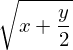

In [3]:
ex1 = x*sp.cos(x)           # note, expressions are immutable
ex2 = x**2 + y**2 + z
ex3 = sp.sqrt(x+y/2)

display(ex1)
display(ex2)
ex3              

### Substite a number or symbol in an expression
* ```subs``` function  

**Exercise**
* For ```ex1=x*sp.cos(x)``` make the following substitutions:
    * $x \rightarrow 1.0$
    * $x \rightarrow 1$
    * $x \rightarrow y$
    * $x \rightarrow y^2+z$
    


* **You can sub more than one thing:**

**Exercise**

* For ```ex = x**2 + 2*x*z - y``` make the substitution $x\rightarrow 4.5$, $y\rightarrow 2.2$.

In [4]:
ex = x**2 + 2*x*z - y          


* **You can also use the ```evalf``` function to get numeric results.**

In [6]:
ex = x**2 + y

ex.evalf(subs={x: 3, y: 4})   

[Pi to a thousand places!](https://getyarn.io/yarn-clip/cb4f3d19-7d79-4dc4-b02f-f2495186a847)

<img src=pi.gif width=500>


In [ ]:
sp.pi.evalf(1000)

### Simplify 

**Exercise**
* Use the ```simplify``` function to simplify the following expression:

In [15]:
ex = (x**2 + 3*x + 2)/(x+1)


### Expand 

**Exercise**
* Use the ```expand``` function to expand the following expression:

In [16]:
ex = (x+2)*(x-3)


### Factor

**Exercise**
* Use the ```factor``` function to factor the following expression:

In [17]:
ex = x**3 - x**2 + x - 1

ex.factor()
sp.factor(ex)
sp.factor( x**3 - x**2 + x - 1 )

### Others: 
* **```collect```**
* **```cancel```**
* **```apart```**
* **```trigsimp```**
* **```expand_trig```**
* **```powsimp```**
* **```expand_power_exp```**
* **```expand_power_base```**
* **```pow_denest```**
* **```expand_log```**
* **```logcombine```**
* etc.


## Calculus

### Derivatives

In [19]:
ex = sp.exp(x**2)

ex.diff(x)                    # these are the same
sp.diff(ex, x)
sp.diff(sp.exp(x**2), x)

**Question: how would you take the third derivative of $x^4$?**

**Exercise**
* Take the following derivative: $$\frac{\partial^3}{\partial x\partial y\partial z}e^{xyz}.$$

* The **```Derivative```** function doesn't evaluate the derivative, it is just used for making an expression.
* To evaluate it use the **```doit```** function.

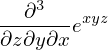

In [20]:
ex = sp.exp(x*y*z)

my_der = sp.Derivative(ex, x, y, z)    # ex.Derivative(x,y,z) doesn't work
my_der

In [21]:
my_der.doit()                 # now evaluate the derivative

### Integrals and limits work the same way:
* **```integrate```** function evaluates and integral
* **```Integral```** function creates an integral expression
* **```doit```** function evaluates an integral expression

**Exercise**
* Try out ```integrate``` on these:
$$\int x^2dx$$
$$\int_0^\infty e^{-x}dx$$
* Try out ```Integrate``` and ```doit``` on the previous expression, with and without the bounds.

**Do a double integral:** $$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}e^{-x^2-y^2}dxdy.$$

#### Example

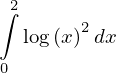

In [28]:
ex = sp.Integral(sp.log(x)**2, (x,0,2))
ex

In [29]:
ex.doit()          # numbers retained

In [30]:
ex.doit().evalf()  # chain up results and evaluate final expression

### Limits
* Use the **```limit```** function to evaluate a limit,
* Also **```Limit```** to create a limit expression,
* **```doit```**   to evaluate a limit expression

Evaluate $$\lim_{x\rightarrow 0}\frac{\sin(x)}{x}.$$

In [34]:
sp.limit(sp.sin(x)/x, x,0)      # unlike integrate we don't combine var and bounds with a tuple (!?)

## Solvers

**Exercise**
Solve $$x^2-y=0$$ with respect to $x$ using the ```solve``` function.

**The above was in the form $f(x)=0$. If we have instead $x^2=1$, then use the ```Eq``` function to create the expression.**

In [37]:
ex = sp.Eq(x**2,y)                # creates expression x^2 = 1


### Systems of equations

**Exercise**
* Solve this:
\begin{align}
x-y+2 &=0 \\
x+y-3 &=0 
\end{align}

* need a tuple of expressions, and a tuple of variables being solved for.

**Exercise**
* Solve this: 
\begin{align}
xy-7 &=0 \\
x+y-6 &= 0
\end{align}


### Solve differential equations
* Use function **```dsolve```**
* Need to define a function symbol.

In [39]:
f = sp.Function('f')         # define a symbol for holding a function
f(x)                         # can also use f,g = sp.symbols('f,g', cls=Function)

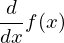

In [40]:
f(x).diff(x)                 # these are the same
sp.diff(f(x), x)             # note: we refer to f(x) not f

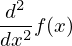

In [41]:
f(x).diff(x,x)               # second derivative

**Setup and solve this equation:**
$$f^{\prime\prime}(x) - 2f^{\prime}(x)+f(x)= \sin(x).$$

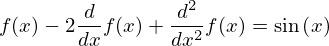

In [42]:
my_diffeq = sp.Eq(f(x).diff(x,x) - 2*f(x).diff(x) + f(x), sp.sin(x))
my_diffeq

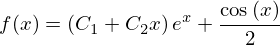

In [43]:
sp.dsolve(my_diffeq, f(x))

## Matrices
### Functions
* **```Matrix```**
* **```shape```**
* **```row```**
* **```col```**
* **```col_del```**
* **```row_del```**
* **```col_insert```**
* **```row_insert```**
* **```T```** for transpose
* **```zeros(m,n)```**
* **```ones(m,n)```**
* **```diag```**
* **```nullspace```**
* **```eigenvals```**
* **```diagonalize```**
* **```rref```**
    

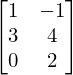

In [35]:
A = sp.Matrix( [ [1,-1], [3,4], [0,2] ] )
A

In [36]:
b = sp.Matrix([1,2])     # assumes a column vector
b

In [37]:
A.shape

In [38]:
A.row(1)

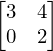

In [39]:
A.row_del(0)
A

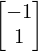

In [40]:
x = A**-1 * b
x

In [41]:
A*x                 # should equal b

### Symbolic matrix solution


In [46]:
m11, m12, m21, m22 = sp.symbols("m11, m12, m21, m22")
b1, b2             = sp.symbols("b1, b2")

In [47]:
A = sp.Matrix([ [m11, m12], [m21, m22] ])    # syntax is similar to numpy
b = sp.Matrix([b1,b2])

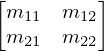

In [48]:
A

In [49]:
b

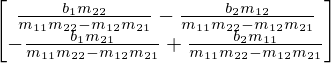

In [50]:
A.inv()*b        # these are the same
A**-1 * b       
